### Step 1: Imports

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Step 2: Resizing

In [ ]:
folder_path = 'QuizDataset/Ylang-ylang'
new_directory = 'Resized Images'

if not os.path.exists(new_directory):
    os.makedirs(new_directory)
    print(f'Directory {new_directory}')
else:
    print(f'Directory {new_directory} already exists')

subfolder_path = os.path.join(new_directory, os.path.basename(folder_path))
if not os.path.exists(subfolder_path):
    os.makedirs(subfolder_path)
    print(f'Subfolder {subfolder_path} created')
else:
    print(f'Subfolder {subfolder_path} already exists')

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

for image_file in image_files:
    image_destination = os.path.join(folder_path, image_file)
    image = cv2.imread(image_destination)
    if image is not None:
        resized_image = cv2.resize(image, (266,266))
        cv2.imwrite(os.path.join(subfolder_path, image_file), resized_image)
        print(f'Resized Image saved: {image_file}')

else:
    print(f'Failed to load image: {image_file}')

### Step 3: Pre-process using HOGDescriptor

In [33]:
def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hog = cv2.HOGDescriptor()
    features = hog.compute(gray)
    print(features)
    return features.flatten()

### Step 4: Load image from set dir

In [34]:
def load_images_from_directory(directory):
    images = []
    labels = []
    class_names = []
    
    for cur_dir, sub_dir,files, in os.walk(directory):
        for class_name in sub_dir:
            sub_dir_path = os.path.join(cur_dir, class_name)
            for filename in os.listdir(sub_dir_path):
                img_path = os.path.join(sub_dir_path, filename)
                img = cv2.imread(img_path)

                if img is not None:
                    images.append(img)
                    labels.append(class_name)
                    class_names.append(class_name)
                    
    return images, labels, class_names

### Step 5: Visualization

In [35]:
def visualize_class_distribution(labels, class_names):
    class_counts = {class_name: labels.count(class_name) for class_name in set(class_names)}
    plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.show()
    total_samples = sum(class_counts.values())
    for class_name, count in class_counts.items():
        percentage = (count / total_samples) * 100
        print(f'{class_name}: {count} samples ({percentage:.2f}%)')

### Step 6: Declare Directory path

In [36]:
directory = 'Resized Images'

### Step 7: Declare images, labels, classnames

In [37]:
images, labels, class_names = load_images_from_directory(directory)

### Step 8: Class Visualization

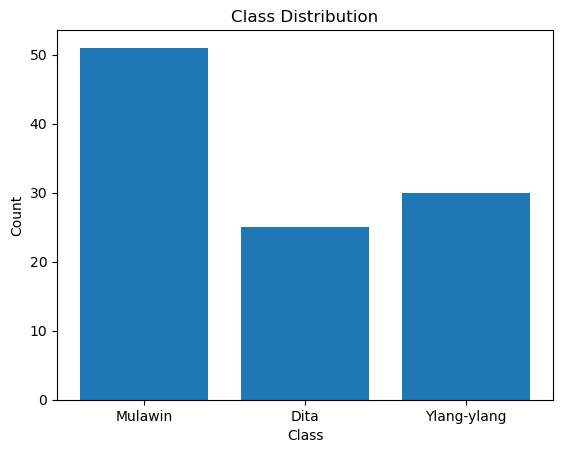

Mulawin: 51 samples (48.11%)
Dita: 25 samples (23.58%)
Ylang-ylang: 30 samples (28.30%)


In [38]:
visualize_class_distribution(labels, class_names)

### Step 9: Use the extract feature extraction function.

In [ ]:
features = np.array([extract_features(img) for img in images])

### Step 10: 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state=42)

### Step 11: Declare the SVM and Random forest classifier

In [46]:
svm_classifier = SVC(kernel='linear')
rfc = RandomForestClassifier(n_estimators = 100)

### Step 12: Fit the models on the declared variables for SVM and Random forest Classifier.

In [49]:
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [48]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

### Step 13: Test accuracy score and multiply it to 100 to get the percentage not decimals.

In [ ]:
y_pred_svm = svm_classifier.predict(X_test)
y_pred_rfc = rfc.predict(X_test)

In [51]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM accuracy score:", accuracy_svm * 100)

SVM accuracy score: 95.45454545454545


In [52]:
accuracy_rf = accuracy_score(y_test, y_pred_rfc)
print("Random Forest Classifier Accuracy:", accuracy_rf * 100)

Random Forest Classifier Accuracy: 77.27272727272727


### Step 14: Create some model testing include some individual testing.

In [83]:
def preprocess_image(image_path, save_path):
    image =cv2.imread(image_path)
    
    resized_image = cv2.resize(image,(266,266))
    
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(save_path, grayscale_image)
    return grayscale_image

In [86]:
input_image_path = 'QuizDataset/Dita/2024_03_26 11_07 AM Office Lens (1).jpg'
save_path = 'pre_process.jpg'
preprocessed_image = preprocess_image(input_image_path, save_path) 